## Imports

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_circles
import pandas as pd
import seaborn as sns

# conda install -c conda-forge mlxtend 
import mlxtend
from mlxtend.plotting import plot_decision_regions

---

## Versions

In [2]:
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Seaborn', sns), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.5.4 |Anaconda custom (x86_64)| (default, Aug 14 2017, 12:43:10) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3
Seaborn Version: 0.8.0
Sklearn Version: 0.19.0


---

## Functions

In [3]:
def auto_plot(df_obj, title=None):
    plt.plot(df_obj.x1[df_obj.target == 1], df_obj.x2[df_obj.target == 1], 'b^', label='class 1')
    plt.plot(df_obj.x1[df_obj.target == 0], df_obj.x2[df_obj.target == 0], 'rs', label='class 0')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend();

---

## Case #1: Linearly Separable

In [4]:
# generate some data
np.random.seed(12)
x1 = np.random.normal(loc=5, scale=3, size = 10)
x2 = np.random.normal(loc=5, scale=3, size = 10)

In [5]:
# build df
mydict = {'x1':x1, 'x2':x2}
df = pd.DataFrame(mydict)
df['target'] = 0

# set target values
for i,_ in df.iterrows():
    if df.loc[i, 'x2'] > 4:
        df.loc[i, 'target'] = 1
        
X_train = df[['x1', 'x2']]
y_train = df.target

df

,x1,x2,target
0,6.418957,3.206531,0
1,2.955722,6.417371,1
2,5.727318,8.287868,1
3,-0.102207,1.354494,0
4,7.259429,9.027069,1
5,0.395836,4.633551,1
6,5.015381,8.037546,1
7,4.639317,2.258393,0
8,2.579054,1.911409,0
9,13.615458,8.629389,1


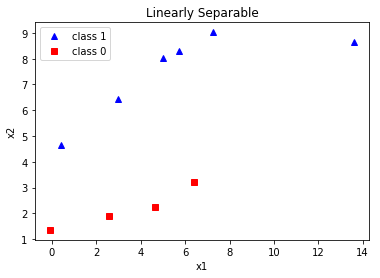

In [6]:
auto_plot(df, title='Linearly Separable')

In [7]:
lsvc = LinearSVC(penalty='l2', loss='hinge', random_state=42)
lsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

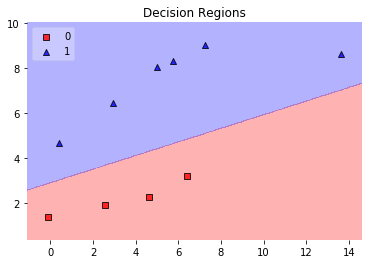

In [8]:
plot_decision_regions(X_train.values, y_train.values, clf=lsvc,res=0.02, legend=2)
plt.title('Decision Regions');

---

## Case #2: Not Linearly Separable (Slack Variables)

In [9]:
# generate some data
np.random.seed(12)
x3 = np.random.normal(loc=5, scale=3, size = 25)
x4 = np.random.normal(loc=5, scale=3, size = 25)

In [10]:
# build df
mydict2 = {'x1':x3, 'x2':x4}
df2 = pd.DataFrame(mydict2)
df2['target'] = 0

# set target values
for i,_ in df2.iterrows():
    if df2.loc[i, 'x2'] > 4:
        df2.loc[i, 'target'] = 1
df2.loc[7, 'target'] = 0
df2.loc[4, 'target'] = 1

X_train2 = df2[['x1', 'x2']]
y_train2 = df2.target

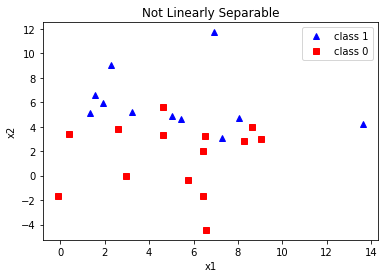

In [11]:
auto_plot(df2, title='Not Linearly Separable')

In [18]:
svc = LinearSVC(penalty='l2', loss='hinge', random_state=42, C=2.5)
svc.fit(X_train2, y_train2)

LinearSVC(C=2.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

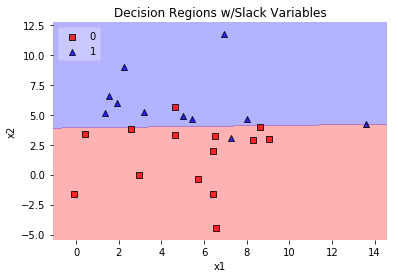

In [19]:
plot_decision_regions(X_train2.values, y_train2.values, clf=svc,res=0.02, legend=2)
plt.title('Decision Regions w/Slack Variables')
plt.xlabel('x1')
plt.ylabel('x2');

---

## Not Linearly Separable (Kernels)

In [20]:
np.random.seed(12)
data = make_circles(n_samples=100, factor=0.5)

In [21]:
mydict3 = {'x1':data[0][:,0], 'x2':data[0][:,1], 'target':data[1]}

In [22]:
df3 = pd.DataFrame(mydict3)
X_train3 = df3[['x1', 'x2']]
y_train3 = df3.target
df3.head()

,target,x1,x2
0,0,-0.535827,0.844328
1,0,0.425779,-0.904827
2,1,0.267913,-0.422164
3,0,-0.187381,0.982287
4,1,-0.318712,0.385257


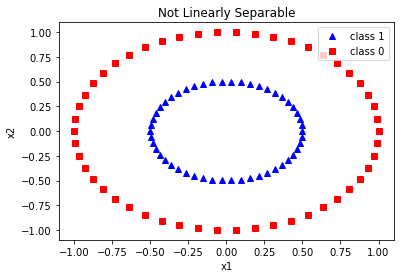

In [23]:
auto_plot(df3, title='Not Linearly Separable')

In [24]:
svc2 = LinearSVC(penalty='l2', loss='hinge', random_state=42, C=1)
svc2.fit(X_train3, y_train3)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

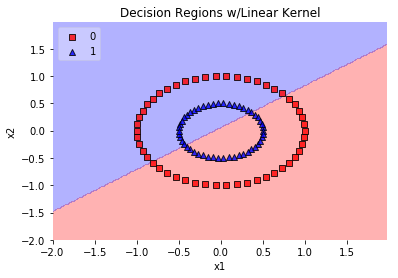

In [25]:
plot_decision_regions(X_train3.values, y_train3.values, clf=svc2,res=0.02, legend=2)
plt.title('Decision Regions w/Linear Kernel')
plt.xlabel('x1')
plt.ylabel('x2');

In [26]:
svm = SVC(C=1.0, kernel='rbf', degree=2, gamma='auto', random_state=42)
svm.fit(X_train3, y_train3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

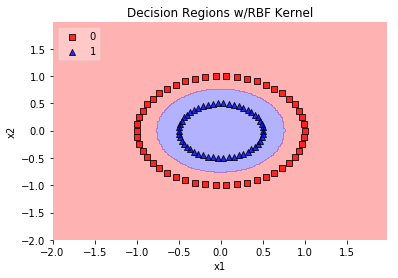

In [27]:
plot_decision_regions(X_train3.values, y_train3.values, clf=svm,res=0.02, legend=2)
plt.title('Decision Regions w/RBF Kernel')
plt.xlabel('x1')
plt.ylabel('x2');

---

# Note:

### Make sure to use **LinearSVC** when using a linear kernel. Do not use SVC(kernel='linear')!

### They use different libraries under the hood and the latter is **MUCH** slower (i.e. does not scale well).